# Importing Necessary Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [4]:
# Import the dataset
insurance_data = pd.read_csv('insurance.csv')

In [5]:
# Print few rows of the dataset
insurance_data.head()

,age,sex,bmi,smoker,alcohol_consumer,disease,charges
0,48,female,31.62,no,no,no,8378.32
1,21,female,28.87,no,yes,no,13508.18
2,35,female,34.51,yes,yes,no,28360.25
3,31,male,25.06,yes,yes,no,26233.89
4,53,male,20.88,yes,no,no,20358.48


In [6]:
# Check how many rows and coumns do ve have (just for the check above count)
insurance_data.shape

(28656, 7)

In [7]:
# Check the data types of the column (Object - categorical column)
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28656 entries, 0 to 28655
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               28656 non-null  int64  
 1   sex               28656 non-null  object 
 2   bmi               28656 non-null  float64
 3   smoker            28656 non-null  object 
 4   alcohol_consumer  28656 non-null  object 
 5   disease           28656 non-null  object 
 6   charges           28656 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1.5+ MB


# Describe the datas of numarical columns

In [9]:
# count - Check how many rows and coumns
# mean - avarage of every columns
# percent - 25% - age (under age 27 there are 25% persons according to my dataset)

insurance_data.describe()

,age,bmi,charges
count,28656.000000,28656.000000,28656.000000
mean,40.035246,29.599232,4936.302853
std,14.007056,6.112546,9289.908990
min,18.000000,15.960000,0.000000
25%,28.000000,25.175000,0.000000
50%,40.000000,29.480000,0.000000
75%,52.000000,33.600000,5739.465000
max,65.000000,53.130000,36015.080000


# Check is there any null values or not

In [11]:
insurance_data.isnull().sum()

age                 0
sex                 0
bmi                 0
smoker              0
alcohol_consumer    0
disease             0
charges             0
dtype: int64

# Exploratory Data Analysis (EDA)

In [13]:
# create a copy of the dataset
insurance_data_copy = insurance_data.copy()

# Data Distribution for Numerical Column - Age

<Figure size 600x600 with 0 Axes>

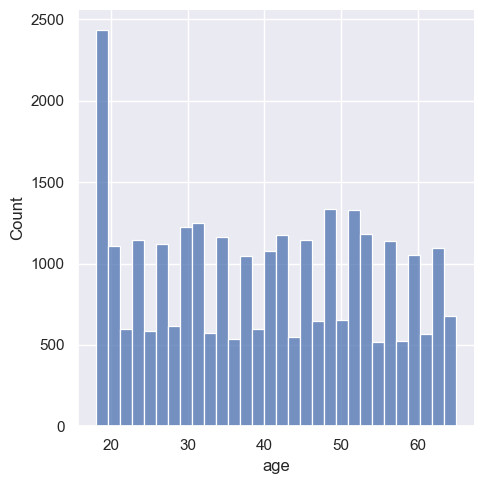

In [15]:
sns.set()
                    # lenght and width
plt.figure(figsize=(6,6))
sns.displot(insurance_data_copy['age'])
plt.show()

# In this the age 20 gap is more persons

In [16]:
# Counts of the persons according to the age
# It is hard to scroll down up and check those that is why created a above chart for a single column

insurance_data_copy['age'].value_counts()

age
18    1232
19    1204
52     693
49     675
48     662
30     657
50     654
47     647
31     635
51     635
27     626
42     623
34     618
32     616
28     614
45     611
20     601
53     598
22     597
39     597
54     585
25     583
24     575
57     573
33     573
60     572
23     571
29     567
56     567
61     567
41     562
63     559
38     557
43     552
44     548
35     546
36     538
62     534
46     532
58     526
55     517
40     514
21     506
64     497
26     494
37     489
59     478
65     179
Name: count, dtype: int64

# Column charts for Categorical Column - Sex

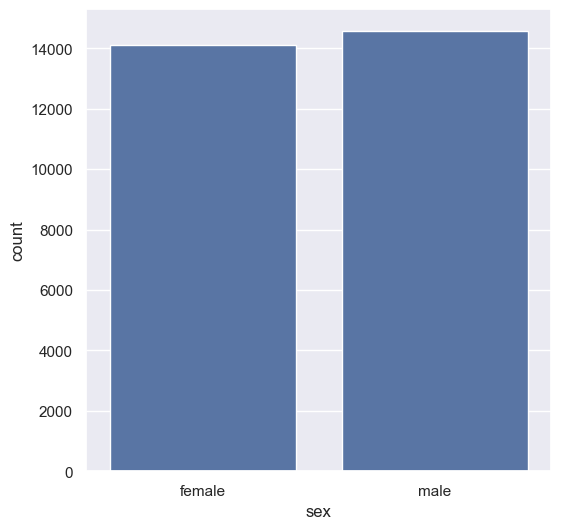

In [18]:
sns.set()
plt.figure(figsize=(6,6))
    # Instead displot here we use countplot
sns.countplot(x= insurance_data_copy['sex'], data = insurance_data)
plt.show()

In [19]:
# The unique value along with the counts

insurance_data_copy['sex'].value_counts()

sex
male      14563
female    14093
Name: count, dtype: int64

# Data Distribution for Numerical Column - BMI

<Figure size 600x600 with 0 Axes>

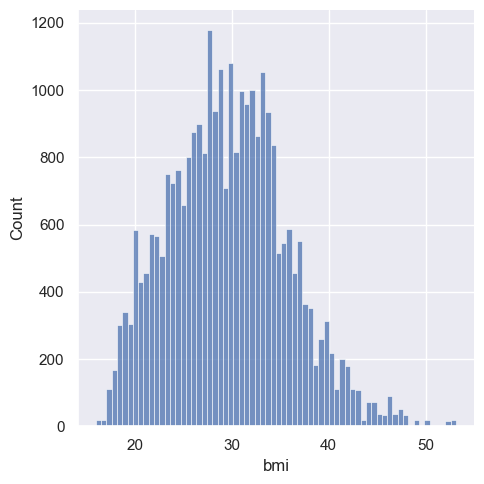

In [21]:
sns.set()
                    # lenght and width
plt.figure(figsize=(6,6))
sns.displot(insurance_data_copy['bmi'])
plt.show()

# Column charts for Categorical Column - Smoker

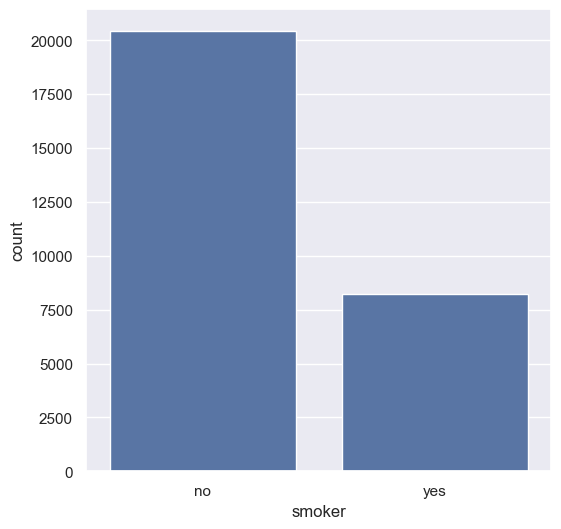

In [23]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x= insurance_data_copy['smoker'], data = insurance_data)
plt.show()

# Column charts for Categorical Column - Alcohol consumer

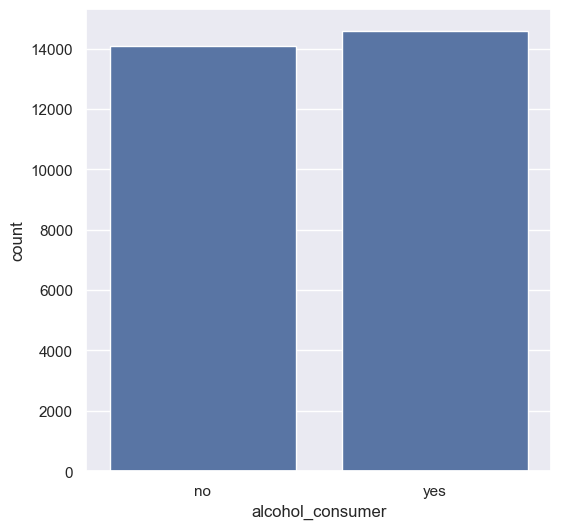

In [25]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x= insurance_data_copy['alcohol_consumer'], data = insurance_data)
plt.show()

# Column charts for Categorical Column - disease

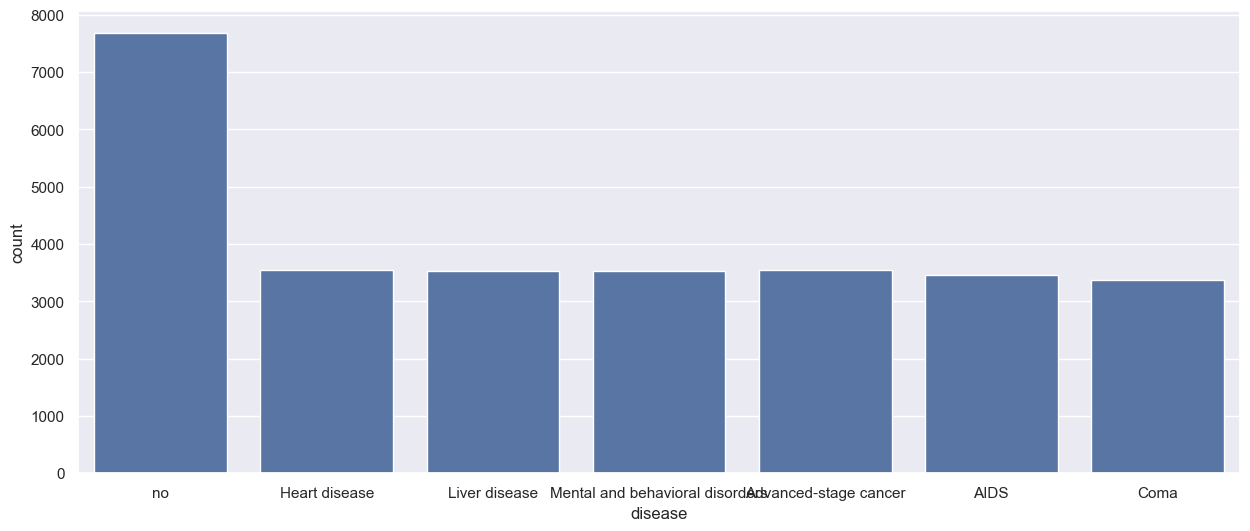

In [27]:
sns.set()
plt.figure(figsize=(15,6))
sns.countplot(x= insurance_data_copy['disease'], data = insurance_data)
plt.show()

In [28]:
# Check unique values of the disease
insurance_data['disease'].value_counts()

disease
no                                 7678
Heart disease                      3547
Advanced-stage cancer              3545
Mental and behavioral disorders    3527
Liver disease                      3522
AIDS                               3460
Coma                               3377
Name: count, dtype: int64

In [29]:
insurance_data

,age,sex,bmi,smoker,alcohol_consumer,disease,charges
0,48,female,31.620,no,no,no,8378.32
1,21,female,28.870,no,yes,no,13508.18
2,35,female,34.510,yes,yes,no,28360.25
3,31,male,25.060,yes,yes,no,26233.89
4,53,male,20.880,yes,no,no,20358.48
...,...,...,...,...,...,...,...
28651,51,female,34.200,no,no,Mental and behavioral disorders,0.00
28652,64,female,39.050,no,no,Coma,0.00
28653,31,male,26.950,no,no,no,5618.67
28654,63,female,31.800,no,no,Liver disease,0.00


# Converting Categorical Columns into Numerical Columns

In [31]:
# Here added (future.no_silent_downcasting) because if not add that, it shows an error and that error has mentioned to add this. How ever it convert

# Explicitly opting in to future behavior
pd.set_option('future.no_silent_downcasting', True)

insurance_data.replace({'sex':{'female':0, 'male':1}}, inplace=True)

insurance_data.replace({'smoker':{'no':0, 'yes':1}}, inplace=True)

insurance_data.replace({'alcohol_consumer':{'no':0, 'yes':1}}, inplace=True)

insurance_data.replace({'disease':{'no':0, 'Heart disease':1, 'Advanced-stage cancer':2, 'Mental and behavioral disorders':3,
                                  'Liver disease':4, 'AIDS':5, 'Coma':6}}, inplace=True)

# Resetting the behavior to avoid affecting other scripts
pd.set_option('future.no_silent_downcasting', False)

In [32]:
insurance_data.head()

,age,sex,bmi,smoker,alcohol_consumer,disease,charges
0,48,0,31.62,0,0,0,8378.32
1,21,0,28.87,0,1,0,13508.18
2,35,0,34.51,1,1,0,28360.25
3,31,1,25.06,1,1,0,26233.89
4,53,1,20.88,1,0,0,20358.48


# Split the dataset into input and output dataset

In [34]:
# Input data - age, sex, bmi, children, smoker, region
# Output data - charges

input_data = insurance_data.drop(columns='charges')
output_data = insurance_data['charges']

In [35]:
input_data

,age,sex,bmi,smoker,alcohol_consumer,disease
0,48,0,31.620,0,0,0
1,21,0,28.870,0,1,0
2,35,0,34.510,1,1,0
3,31,1,25.060,1,1,0
4,53,1,20.880,1,0,0
...,...,...,...,...,...,...
28651,51,0,34.200,0,0,3
28652,64,0,39.050,0,0,6
28653,31,1,26.950,0,0,0
28654,63,0,31.800,0,0,4


In [36]:
output_data

0         8378.32
1        13508.18
2        28360.25
3        26233.89
4        20358.48
           ...   
28651        0.00
28652        0.00
28653     5618.67
28654        0.00
28655        0.00
Name: charges, Length: 28656, dtype: float64

# Split the dataset into 2 parts (Training dataset - 80% and Testing dataset - 20%)

In [38]:
# use sklearn for this (train_test_split) - we have already imported
# Convert the input_data into input_train_data, input_test_data
# COnvert the output_data into output_train_data, output_test_data
input_train_data, input_test_data, output_train_data, output_test_data = train_test_split(input_data, output_data, test_size=0.2)

In [39]:
# print the input shape
print(input_data.shape, input_train_data.shape, input_test_data.shape)

(28656, 6) (22924, 6) (5732, 6)


In [40]:
# print the output shape
print(output_data.shape, output_train_data.shape, output_test_data.shape)

(28656,) (22924,) (5732,)


# Create the Model- RandomForestRegressor

In [42]:
model = RandomForestRegressor(n_estimators=100, max_depth=7)

In [43]:
#Training the Model
model.fit(input_train_data, output_train_data)

RandomForestRegressor(max_depth=7)

In [44]:
#predicting values with Test Dataset
test_data_predictions = model.predict(input_test_data) 

In [45]:
# input test datas are here
test_data_predictions

array([    0.        ,     0.        ,     0.        , ...,
       29821.4141222 ,     0.        , 19829.41810748])

In [46]:
#Evaluating Model - r2_score is one of the metrics going ot evaluate our model score
from sklearn.metrics import r2_score

In [47]:
# output_test_data having the actual value
# r2 score ranges between 0 and 1, if it is near to the one that means our model is performing very well, if it is near to the 0 it is not performing well
# here I got 99% means the data is matching with the actuall value
r2_score(test_data_predictions,output_test_data)

0.9953651857004281

# Support Vector Regression (SVR)

In [49]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

svr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
svr.fit(input_train_data, output_train_data)
y_pred_svr = svr.predict(input_test_data)
print("R^2 Score for SVR:", r2_score(output_test_data, y_pred_svr))


R^2 Score for SVR: -0.211813640796495


# Lasso Regression

In [51]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(input_train_data, output_train_data)
y_pred_lasso = lasso.predict(input_test_data)
print("R^2 Score for Lasso Regression:", r2_score(output_test_data, y_pred_lasso))


R^2 Score for Lasso Regression: 0.5901412133321564


# Elastic Net Regression

In [53]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(input_train_data, output_train_data)
y_pred_en = elastic_net.predict(input_test_data)
print("R^2 Score for Elastic Net:", r2_score(output_test_data, y_pred_en))


R^2 Score for Elastic Net: 0.5804361213249876


# Ridge Regression

In [55]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(input_train_data, output_train_data)
y_pred_ridge = ridge.predict(input_test_data)
print("R^2 Score for Ridge Regression:", r2_score(output_test_data, y_pred_ridge))


R^2 Score for Ridge Regression: 0.5901381523642577


In [56]:
input_train_data

,age,sex,bmi,smoker,alcohol_consumer,disease
14336,20,1,22.00,0,0,3
5372,22,0,27.10,0,1,5
21602,31,0,28.12,0,1,0
11780,62,0,36.86,0,0,4
28615,47,0,21.14,0,0,0
...,...,...,...,...,...,...
13903,56,0,39.82,0,1,5
10502,18,0,25.10,1,1,0
13504,57,0,23.98,0,1,2
2766,23,0,36.67,1,0,1


In [66]:
# Check model feature names
feature_names = model.feature_names_in_
print("Expected Features:", feature_names)

# Input data (Order: age sex bmi smoker alcohol_consumer disease)
input_data = (48, 0, 31.62, 0, 0, 0)

# Convert above data into numpy array
input_data_array = np.asarray(input_data)

# Now convert the input data array into a shape (reshape we have to do it)
input_data_array = input_data_array.reshape(1,-1)

# Wrap the reshaped NumPy array in a DataFrame, ensuring the column names match the feature names.
feature_names = model.feature_names_in_
input_data_df = pd.DataFrame(input_data_array, columns=feature_names)

# Predict using the DataFrame
insurance_premium = model.predict(input_data_df)

Expected Features: ['age' 'sex' 'bmi' 'smoker' 'alcohol_consumer' 'disease']


In [68]:
print(f"Predicted Insurance Premium: {insurance_premium[0]}")

Predicted Insurance Premium: 8142.950247613361


# Save the model

In [ ]:
import pickle as pkl

In [ ]:
pkl.dump(model, open('MIPML.pkl','wb'))